In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zomato_data = pd.read_csv('ZomatoData.csv',encoding='ISO-8859-1')

In [3]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
zdata = zomato_data.drop(['Restaurant ID','Restaurant Name','Country Code'],axis=1)

In [5]:
zdata.duplicated().sum()

0

In [6]:
zdata.isnull().sum()

City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
zdata = zdata.drop(['Address','Longitude','Latitude'],axis=1)

In [8]:
zdata = zdata.rename(columns={'Has Table booking':'Table_Booking','Average Cost for two':'Avg_Cost_2','Has Online delivery':'Online_Delivery'})

In [9]:
zdata.Table_Booking.replace(('Yes','No'),(True,False),inplace=True)
zdata.Online_Delivery.replace(('Yes','No'),(True,False),inplace=True)

In [10]:
zdata = zdata.drop(['Locality','Locality Verbose'],axis=1)

<AxesSubplot:>

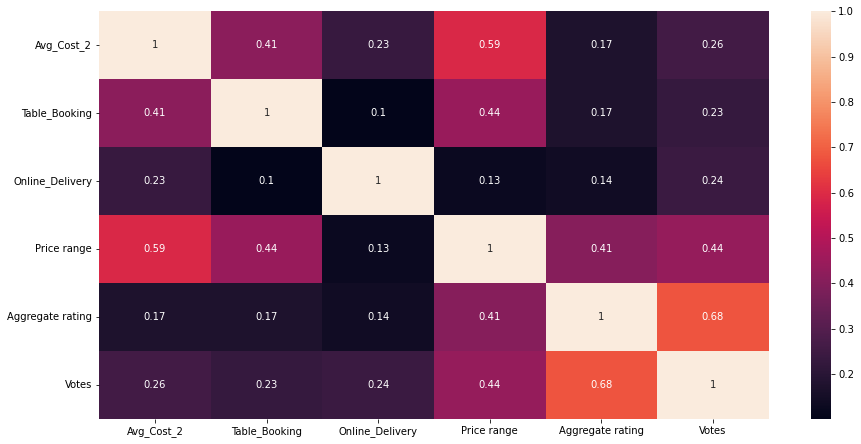

In [11]:
#Getting correlation between different variables

zdata_corr = zdata.corr(method='kendall')
plt.figure(figsize=(15,7.5))
sns.heatmap(zdata_corr, annot=True)

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants delivering online or Not')

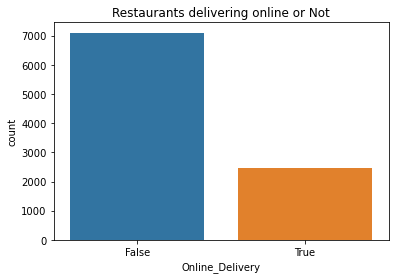

In [12]:
sns.countplot(zdata['Online_Delivery'])
flg = plt.gcf()
flg.set_size_inches(6,4)
plt.title("Restaurants delivering online or Not")

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants allowing table booking or Not')

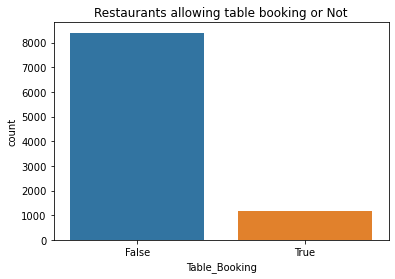

In [13]:
sns.countplot(zdata['Table_Booking'])
flg = plt.gcf()
flg.set_size_inches(6,4)
plt.title("Restaurants allowing table booking or Not")

In [16]:
zdata['Cuisines'] = zdata['Cuisines'].astype('str')
cuisines_list_Unique = []
total_cuisines = []
for i in zdata["Cuisines"]:
    temp = i.split(", ")
    for j in temp:
        total_cuisines.append(j)
        if j not in cuisines_list_Unique:
            cuisines_list_Unique.append(j)

Count = []
for i in cuisines_list_Unique:
    Count.append(total_cuisines.count(i))
    
Cusines_List = pd.DataFrame(cuisines_list_Unique,columns = ['Cuisines'])
Cusines_List["Total_No_Avail"] = Count

Cusines_List = Cusines_List.sort_values(by=["Total_No_Avail"],ascending =False)

Popular_Cusines = Cusines_List.head(25)
Popular_Cusines

,Cuisines,Total_No_Avail
82,North Indian,3960
9,Chinese,2735
19,Fast Food,1986
83,Mughlai,995
15,Italian,764
17,Bakery,745
72,Continental,736
14,Cafe,703
2,Desserts,653
85,South Indian,636


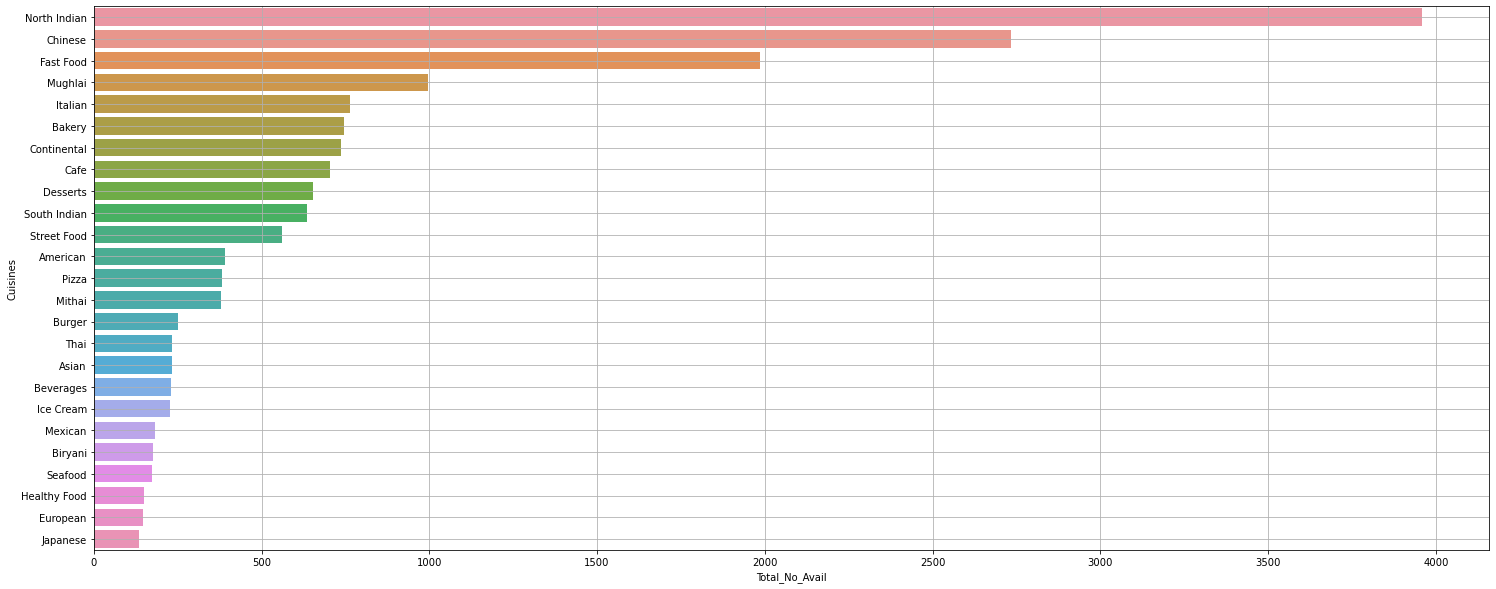

In [17]:
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Total_No_Avail', y='Cuisines', ax=ax, data=Popular_Cusines)
plt.grid()
plt.show()